In [1]:
import pandas as pd
import wikipedia as wp
#Get the html source
html = wp.page("List of U.S. states and territories by income").html().encode("UTF-8")
df_pci = pd.read_html(html)[4]
data_cleaning = pd.DataFrame(df_pci)
income=data_cleaning.drop(['Rank'], axis=1)
df1=income
df1.replace(',','', regex=True, inplace=True)
colstocheck = ['Per capitaincome','Medianhouseholdincome','Medianfamilyincome']
df1[colstocheck] = df1[colstocheck].replace({'\$':''}, regex = True)
for i in [i for i in list(range(len(df1.columns))) if i not in [0]]:
    df1.iloc[:,i]=pd.to_numeric(df1.iloc[:,i])
df1

,State or territory,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds,Number offamilies
0,District of Columbia,45877,71648,84094,658893,277378,117864
1,Connecticut,39373,70048,88819,3596677,1355817,887263
2,New Jersey,37288,69160,87951,8938175,2549336,1610581
3,Massachusetts,36593,71919,88419,6938608,3194844,2203675
4,Maryland,36338,73971,89678,5976407,2165438,1445972
5,New Hampshire,34691,66532,80581,1326813,519756,345901
6,Virginia,34052,64902,78290,8326289,3083820,2058820
7,New York,33095,58878,71115,19746227,7282398,4621954
8,North Dakota,33071,59029,75221,739482,305431,187800
9,Alaska,33062,71583,82307,736732,249659,165015


In [2]:
Cols_to_normalize = ["Per capitaincome",       
"Medianhouseholdincome",  
"Medianfamilyincome",     
"Population",             
"Number ofhouseholds",    
"Number offamilies"]
normalized_df1=(df1[Cols_to_normalize]-df1[Cols_to_normalize].min())/(df1[Cols_to_normalize].max()-df1[Cols_to_normalize].min())
df1[Cols_to_normalize] = normalized_df1
df1=df1.rename(columns = {'State or territory':'State'})
df1

,State,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds,Number offamilies
0,District of Columbia,1.000000,0.957137,0.916933,0.001898,0.002283,0.001413
1,Connecticut,0.835616,0.927615,0.987222,0.011113,0.011481,0.011387
2,New Jersey,0.782920,0.911230,0.974309,0.027868,0.021660,0.020763
3,Massachusetts,0.765354,0.962137,0.981271,0.021596,0.027166,0.028452
4,Maryland,0.758909,1.000000,1.000000,0.018578,0.018386,0.018629
5,New Hampshire,0.717283,0.862739,0.864674,0.003993,0.004350,0.004369
6,Virginia,0.701132,0.832663,0.830594,0.025948,0.026219,0.026574
7,New York,0.676945,0.721511,0.723859,0.061770,0.062028,0.059799
8,North Dakota,0.676338,0.724297,0.784940,0.002151,0.002522,0.002320
9,Alaska,0.676111,0.955938,0.890350,0.002142,0.002047,0.002025


In [3]:
#Get the html source
html = wp.page("List of U.S. states and territories by incarceration and correctional supervision rate").html().encode("UTF-8")
df_correctional = pd.read_html(html)[2]
#df.to_csv('List of U.S. states and territories by incarceration and correctional supervision rate.csv',header=0,index=False)
data_cleaning1 = pd.DataFrame(df_correctional)
df2 = data_cleaning1.drop(['2016rate per100,000adults','2016rate per100,000of all ages'], axis=1)
df_jail=df2
df_jail.replace(',','', regex=True, inplace=True)
df_jail.iat[6,1] = 15000
df_jail['Year-end2016. Inprisonor jail'] = pd.to_numeric(df_jail['Year-end2016. Inprisonor jail'])
df_jail = df_jail.iloc[:-3]
df_jail['Year-end2016. Inprisonor jail']=(df_jail['Year-end2016. Inprisonor jail']-df_jail['Year-end2016. Inprisonor jail'].min())/(df_jail['Year-end2016. Inprisonor jail'].max()-df_jail['Year-end2016. Inprisonor jail'].min())
df_jail=df_jail.rename(columns = {'Jurisdiction':'State'})
df_jail

C:\Users\vigne\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,State,Year-end2016. Inprisonor jail
0,Alabama,0.180812
1,Alaska,0.012454
2,Arizona,0.245849
3,Arkansas,0.102860
4,California,0.927122
5,Colorado,0.140221
6,Connecticut,0.061347
7,Delaware,0.022601
8,District of Columbia,0.000461
9,Florida,0.683118


In [4]:
#Get the html source
html = wp.page("List of U.S. states and territories by educational attainment").html().encode("UTF-8")
df_education = pd.read_html(html)[1]
#df.to_csv('List of U.S. states and territories by educational attainment.csv',header=0,index=False)
data_educ = pd.DataFrame(df_education)
df_education = data_educ.drop(["High School rank","Bachelor's rank","Advanced rank"], axis=1)
df_edu=df_education
df_edu.replace('%','', regex=True, inplace=True)
for i in [i for i in list(range(len(df_edu.columns))) if i not in [0]]:
    df_edu.iloc[:,i]=pd.to_numeric(df_edu.iloc[:,i],downcast='float')
df_edu['% High school graduate or higher']=(df_edu['% High school graduate or higher']-df_edu['% High school graduate or higher'].min())/(df_edu['% High school graduate or higher'].max()-df_edu['% High school graduate or higher'].min())
df_edu["% Bachelor's degree or higher"]=(df_edu["% Bachelor's degree or higher"]-df_edu["% Bachelor's degree or higher"].min())/(df_edu["% Bachelor's degree or higher"].max()-df_edu["% Bachelor's degree or higher"].min())
df_edu['% Advanced degree']=(df_edu['% Advanced degree']-df_edu['% Advanced degree'].min())/(df_edu['% Advanced degree'].max()-df_edu['% Advanced degree'].min())
df_edu=df_edu.rename(columns = {'State, federal district, or territory':'State'})
df_edu

,State,% High school graduate or higher,% Bachelor's degree or higher,% Advanced degree
0,Montana,1.000000,0.445396,0.225256
1,New Hampshire,0.991701,0.558887,0.351536
2,Minnesota,0.991701,0.533191,0.283276
3,Wyoming,0.991701,0.359743,0.197952
4,Alaska,0.975104,0.408994,0.235495
5,North Dakota,0.970954,0.406852,0.146758
6,Vermont,0.970954,0.576017,0.392491
7,Maine,0.962656,0.436831,0.252560
8,Iowa,0.950208,0.381156,0.187713
9,Utah,0.950208,0.483940,0.255973


In [5]:
#Get the html source
html = wp.page("List of U.S. states and territories by unemployment rate").html().encode("UTF-8")
df_unemp = pd.read_html(html)[0]
#df.to_csv('List of U.S. states and territories by unemployment rate.csv',header=0,index=False)
data_unemp = pd.DataFrame(df_unemp)
df_unemployment= data_unemp.drop(["Rank","Rank(50 states)", "Monthly change (%) (=drop in unemployment)"], axis=1)
df_unemp=df_unemployment
df_unemp.replace('%','', regex=True, inplace=True)
df_unemp["Statefederal district or territory"] = df_unemp["Statefederal district or territory"].str.split('[', n = 1, expand = True) 
df_unemp["Unemployment rate (seasonally adjusted)"] = df_unemp["Unemployment rate (seasonally adjusted)"].str.split('[', n = 1, expand = True) 
df_unemp.columns = ['State', 'Unemployment Rate']
df_unemp['Unemployment Rate']=pd.to_numeric(df_unemp['Unemployment Rate'],downcast='float')
df_unemp["Unemployment Rate"]=(df_unemp["Unemployment Rate"]-df_unemp["Unemployment Rate"].min())/(df_unemp["Unemployment Rate"].max()-df_unemp["Unemployment Rate"].min())
df_unemp

,State,Unemployment Rate
0,Nevada,1.000000
1,Michigan,0.776423
2,Hawaii,0.760163
3,Rhode Island,0.544715
4,Indiana,0.540650
5,Ohio,0.536585
6,Illinois,0.520325
7,New Hampshire,0.516260
8,Vermont,0.487805
9,California,0.483740


In [6]:
dfs = [df1, df_jail, df_edu, df_unemp]
mdf=pd.merge(pd.merge(pd.merge(df1,df_jail,on='State'),df_edu,on='State'),df_unemp,on='State')
mdf

,State,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds,Number offamilies,Year-end2016. Inprisonor jail,% High school graduate or higher,% Bachelor's degree or higher,% Advanced degree,Unemployment Rate
0,District of Columbia,1.000000,0.957137,0.916933,0.001898,0.002283,0.001413,0.000461,0.887967,1.000000,1.000000,0.304878
1,Connecticut,0.835616,0.927615,0.987222,0.011113,0.011481,0.011387,0.061347,0.883817,0.610278,0.460751,0.174797
2,New Jersey,0.782920,0.911230,0.974309,0.027868,0.021660,0.020763,0.139760,0.842324,0.603854,0.382253,0.475610
3,Massachusetts,0.765354,0.962137,0.981271,0.021596,0.027166,0.028452,0.081642,0.887967,0.689507,0.518771,0.467480
4,Maryland,0.758909,1.000000,1.000000,0.018578,0.018386,0.018629,0.123155,0.867220,0.623126,0.494881,0.256098
5,New Hampshire,0.717283,0.862739,0.864674,0.003993,0.004350,0.004369,0.012915,0.991701,0.558887,0.351536,0.516260
6,Virginia,0.701132,0.832663,0.830594,0.025948,0.026219,0.026574,0.257380,0.834025,0.593148,0.430034,0.284553
7,New York,0.676945,0.721511,0.723859,0.061770,0.062028,0.059799,0.335332,0.713693,0.543897,0.406143,0.443089
8,North Dakota,0.676338,0.724297,0.784940,0.002151,0.002522,0.002320,0.006458,0.970954,0.406852,0.146758,0.199187
9,Alaska,0.676111,0.955938,0.890350,0.002142,0.002047,0.002025,0.012454,0.975104,0.408994,0.235495,0.378049


In [36]:
mdf.set_index('State')
mdf

,State,Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds,Number offamilies,Year-end2016. Inprisonor jail,% High school graduate or higher,% Bachelor's degree or higher,% Advanced degree,Unemployment Rate
0,District of Columbia,1.000000,0.957137,0.916933,0.001898,0.002283,0.001413,0.000461,0.887967,1.000000,1.000000,0.304878
1,Connecticut,0.835616,0.927615,0.987222,0.011113,0.011481,0.011387,0.061347,0.883817,0.610278,0.460751,0.174797
2,New Jersey,0.782920,0.911230,0.974309,0.027868,0.021660,0.020763,0.139760,0.842324,0.603854,0.382253,0.475610
3,Massachusetts,0.765354,0.962137,0.981271,0.021596,0.027166,0.028452,0.081642,0.887967,0.689507,0.518771,0.467480
4,Maryland,0.758909,1.000000,1.000000,0.018578,0.018386,0.018629,0.123155,0.867220,0.623126,0.494881,0.256098
5,New Hampshire,0.717283,0.862739,0.864674,0.003993,0.004350,0.004369,0.012915,0.991701,0.558887,0.351536,0.516260
6,Virginia,0.701132,0.832663,0.830594,0.025948,0.026219,0.026574,0.257380,0.834025,0.593148,0.430034,0.284553
7,New York,0.676945,0.721511,0.723859,0.061770,0.062028,0.059799,0.335332,0.713693,0.543897,0.406143,0.443089
8,North Dakota,0.676338,0.724297,0.784940,0.002151,0.002522,0.002320,0.006458,0.970954,0.406852,0.146758,0.199187
9,Alaska,0.676111,0.955938,0.890350,0.002142,0.002047,0.002025,0.012454,0.975104,0.408994,0.235495,0.378049


In [7]:
cols_for_viz = ["State","Per capitaincome","Year-end2016. Inprisonor jail","% High school graduate or higher","Unemployment Rate"]
dv = mdf[cols_for_viz]
dv

,State,Per capitaincome,Year-end2016. Inprisonor jail,% High school graduate or higher,Unemployment Rate
0,District of Columbia,1.000000,0.000461,0.887967,0.304878
1,Connecticut,0.835616,0.061347,0.883817,0.174797
2,New Jersey,0.782920,0.139760,0.842324,0.475610
3,Massachusetts,0.765354,0.081642,0.887967,0.467480
4,Maryland,0.758909,0.123155,0.867220,0.256098
5,New Hampshire,0.717283,0.012915,0.991701,0.516260
6,Virginia,0.701132,0.257380,0.834025,0.284553
7,New York,0.676945,0.335332,0.713693,0.443089
8,North Dakota,0.676338,0.006458,0.970954,0.199187
9,Alaska,0.676111,0.012454,0.975104,0.378049


In [8]:
dv.set_index('State', inplace=True, drop=True)
dv

,Per capitaincome,Year-end2016. Inprisonor jail,% High school graduate or higher,Unemployment Rate
State,,,,
District of Columbia,1.000000,0.000461,0.887967,0.304878
Connecticut,0.835616,0.061347,0.883817,0.174797
New Jersey,0.782920,0.139760,0.842324,0.475610
Massachusetts,0.765354,0.081642,0.887967,0.467480
Maryland,0.758909,0.123155,0.867220,0.256098
New Hampshire,0.717283,0.012915,0.991701,0.516260
Virginia,0.701132,0.257380,0.834025,0.284553
New York,0.676945,0.335332,0.713693,0.443089
North Dakota,0.676338,0.006458,0.970954,0.199187


In [9]:
dv_neighbors=dv.loc[['Michigan', 'Wisconsin','Illinois','Indiana','Ohio','New York',
'Pennsylvania',
'West Virginia',
'Kentucky',
'Missouri',
'Iowa',
'Minnesota']]
dv_neighbors

,Per capitaincome,Year-end2016. Inprisonor jail,% High school graduate or higher,Unemployment Rate
State,,,,
Michigan,0.513117,0.252768,0.883817,0.776423
Wisconsin,0.553556,0.156365,0.946058,0.426829
Illinois,0.609260,0.272601,0.817427,0.520325
Indiana,0.475888,0.191421,0.804979,0.540650
Ohio,0.521306,0.319649,0.867220,0.536585
New York,0.676945,0.335332,0.713693,0.443089
Pennsylvania,0.579007,0.372232,0.871369,0.467480
West Virginia,0.414573,0.038745,0.705394,0.471545
Kentucky,0.439089,0.152214,0.676348,0.479675


In [10]:
dv_neighbors=dv_neighbors.reset_index(drop=False)
dv_neighbors

,State,Per capitaincome,Year-end2016. Inprisonor jail,% High school graduate or higher,Unemployment Rate
0,Michigan,0.513117,0.252768,0.883817,0.776423
1,Wisconsin,0.553556,0.156365,0.946058,0.426829
2,Illinois,0.609260,0.272601,0.817427,0.520325
3,Indiana,0.475888,0.191421,0.804979,0.540650
4,Ohio,0.521306,0.319649,0.867220,0.536585
5,New York,0.676945,0.335332,0.713693,0.443089
6,Pennsylvania,0.579007,0.372232,0.871369,0.467480
7,West Virginia,0.414573,0.038745,0.705394,0.471545
8,Kentucky,0.439089,0.152214,0.676348,0.479675
9,Missouri,0.500809,0.196494,0.842324,0.247967


In [43]:
dv_neighbors=dv_neighbors.rename(columns={"State": "State", "Per capitaincome": "Per capita income","Year-end2016. Inprisonor jail":"# Imprisoned (Crime Indicator)","% High school graduate or higher":"High school Graduation rate","Unemployment Rate":"Unemployment Rate"})
#dv_neighbors.columns['State','Per capita income','Imprisoned-Crime Indicator', 'High school Graduation rate', 'Unemployment Rate']
dv_neighbors

,index,State,Per capita income,# Imprisoned (Crime Indicator),High school Graduation rate,Unemployment Rate
0,0,Michigan,0.513117,0.252768,0.883817,0.776423
1,1,Wisconsin,0.553556,0.156365,0.946058,0.426829
2,2,Illinois,0.609260,0.272601,0.817427,0.520325
3,3,Indiana,0.475888,0.191421,0.804979,0.540650
4,4,Ohio,0.521306,0.319649,0.867220,0.536585
5,5,New York,0.676945,0.335332,0.713693,0.443089
6,6,Pennsylvania,0.579007,0.372232,0.871369,0.467480
7,7,West Virginia,0.414573,0.038745,0.705394,0.471545
8,8,Kentucky,0.439089,0.152214,0.676348,0.479675
9,9,Missouri,0.500809,0.196494,0.842324,0.247967


In [44]:
dv_neighbors=dv_neighbors.reset_index(drop=False)
melt_df = pd.melt(dv_neighbors, id_vars =['State'], value_vars =["Per capita income","# Imprisoned (Crime Indicator)","High school Graduation rate","Unemployment Rate"])
melt_df

,State,variable,value
0,Michigan,Per capita income,0.513117
1,Wisconsin,Per capita income,0.553556
2,Illinois,Per capita income,0.609260
3,Indiana,Per capita income,0.475888
4,Ohio,Per capita income,0.521306
5,New York,Per capita income,0.676945
6,Pennsylvania,Per capita income,0.579007
7,West Virginia,Per capita income,0.414573
8,Kentucky,Per capita income,0.439089
9,Missouri,Per capita income,0.500809


In [45]:
melt_df=melt_df.rename(columns={"State": "State", "variable":"Socioeconomic variable","value":"value"})
melt_df

,State,Socioeconomic variable,value
0,Michigan,Per capita income,0.513117
1,Wisconsin,Per capita income,0.553556
2,Illinois,Per capita income,0.609260
3,Indiana,Per capita income,0.475888
4,Ohio,Per capita income,0.521306
5,New York,Per capita income,0.676945
6,Pennsylvania,Per capita income,0.579007
7,West Virginia,Per capita income,0.414573
8,Kentucky,Per capita income,0.439089
9,Missouri,Per capita income,0.500809


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [14]:
plt.style.use('seaborn-colorblind')

<IPython.core.display.Javascript object>


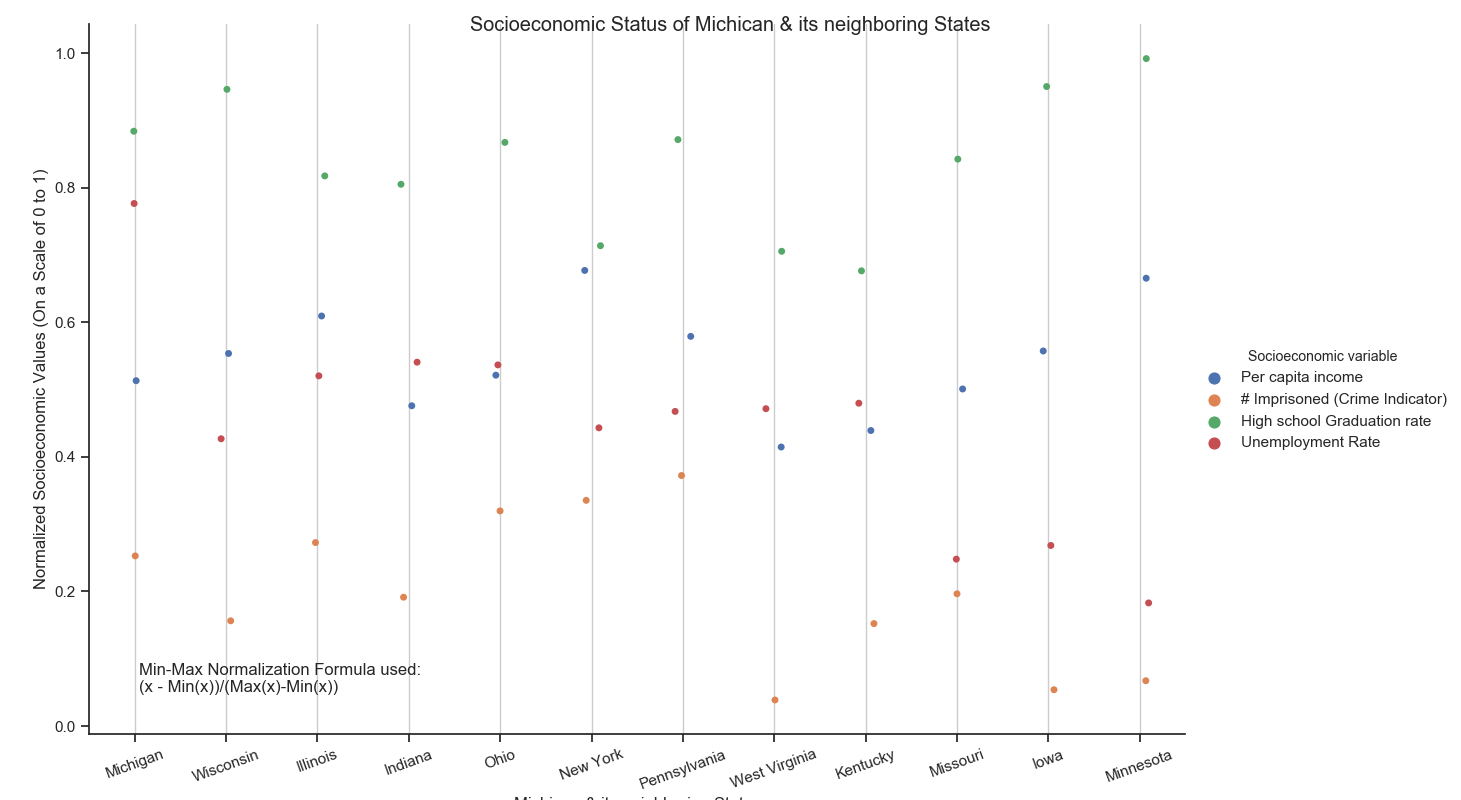

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
textstr = '\n'.join((
    r'Min-Max Normalization Formula used:',
    r'(x - Min(x))/(Max(x)-Min(x))'))
g=sns.catplot(x="State", y="value", hue="Socioeconomic variable", data=melt_df, height=8, aspect=1.5)
g.set(xlabel='Michigan & its neighboring States', ylabel='Normalized Socioeconomic Values (On a Scale of 0 to 1)')
g.set_xticklabels(rotation=20)
g.fig.suptitle('Socioeconomic Status of Michican & its neighboring States')
plt.annotate(textstr, xy=(0.05, 0.05))
plt.grid(axis='x')  #just add this
plt.show()

In [83]:
g.savefig("Assignment4 - Whitegrid_final.png")